In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [111]:
beta2_values = np.linspace(0, 0.16, 9)

In [112]:
def power_simple(n, m):

    np.random.seed(42)

    esperances = []
    variances = []
    test_statistics = []
    msea = []
    mseb = []

    beta1 = 2
    epsilon = np.random.normal(0, 1, n + m) 
    x = np.random.uniform(0, 5, n + m)

    x_train = x[:n]
    x_test = x[n:n+m]

    epsilon_train = epsilon[:n]
    epsilon_test = epsilon[n:n+m]
    
    for beta2 in beta2_values:
            
        y_train = beta1 * x_train + beta2 * x_train**2 + epsilon_train
        y_test = beta1 * x_test + beta2 * x_test**2 + epsilon_test

        # Linear Model : A
        model_a = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
        y_pred_a = model_a.predict(x_test.reshape(-1, 1))
        pa = (y_test - y_pred_a)**2
        msea.append(mean_squared_error(y_test, y_pred_a))

        # Quadratic Model : B
        x_train_quad = np.column_stack((x_train, x_train**2))
        x_test_quad = np.column_stack((x_test, x_test**2))
            
        model_b = LinearRegression().fit(x_train_quad, y_train)
        y_pred_b = model_b.predict(x_test_quad)
        pb = (y_test - y_pred_b)**2
        mseb.append(mean_squared_error(y_test, y_pred_b))

        differences = pa - pb

        d_barre = sum(differences)/m
        var = np.var(differences, ddof=1)
        test_stat = (m**0.5)*d_barre/np.sqrt(var)
        
        test_statistics.append(test_stat)
        esperances.append(d_barre)
        variances.append(var) # Statistique pour l'hypothèse nulle

    return test_statistics, esperances, variances, msea, mseb


In [113]:
test_statistics_150, esperances_150, variances_150, msea_150, mseb_150 = power_simple(150,150)
test_statistics_2000, esperances_2000, variances_2000, msea_2000, mseb_2000 = power_simple(150,2000)

In [114]:
# Premières vérifications sur la MSE

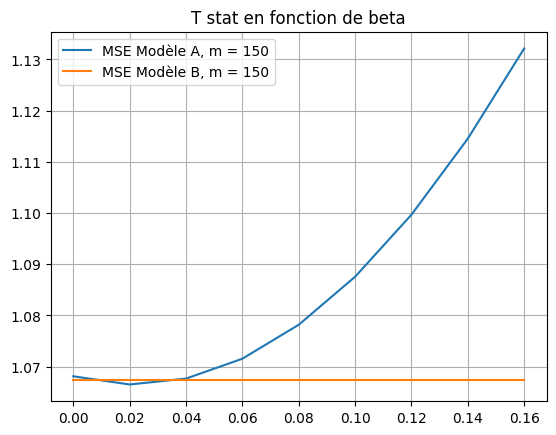

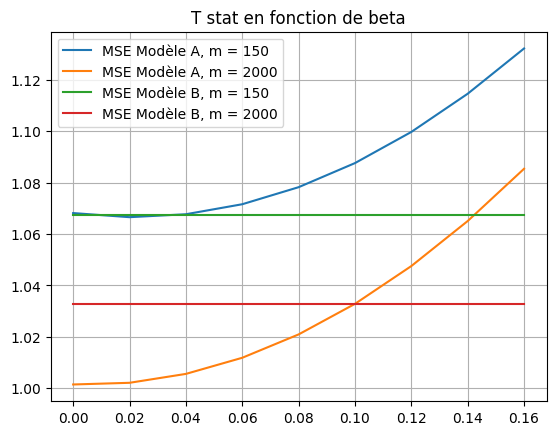

In [115]:
plt.figure()
plt.title("T stat en fonction de beta")
plt.plot(beta2_values, msea_150, label = "MSE Modèle A, m = 150")
plt.plot(beta2_values, mseb_150, label = "MSE Modèle B, m = 150")
plt.grid()
plt.legend()
plt.show()

plt.figure()
plt.title("T stat en fonction de beta")
plt.plot(beta2_values, msea_150, label = "MSE Modèle A, m = 150")
plt.plot(beta2_values, msea_2000, label = "MSE Modèle A, m = 2000")
plt.plot(beta2_values, mseb_150, label = "MSE Modèle B, m = 150")
plt.plot(beta2_values, mseb_2000, label = "MSE Modèle B, m = 2000")
plt.grid()
plt.legend()
plt.show()


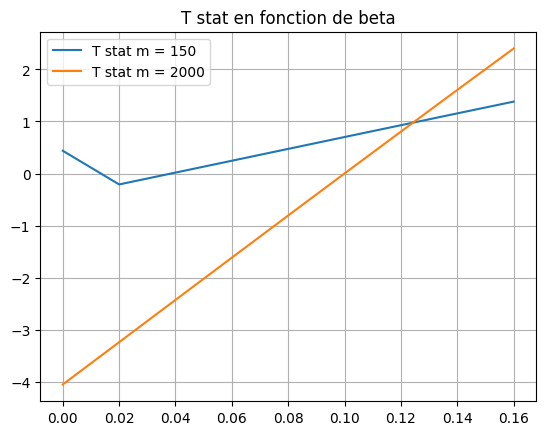

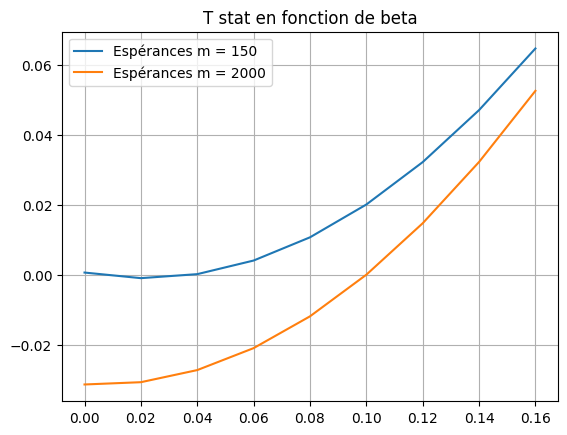

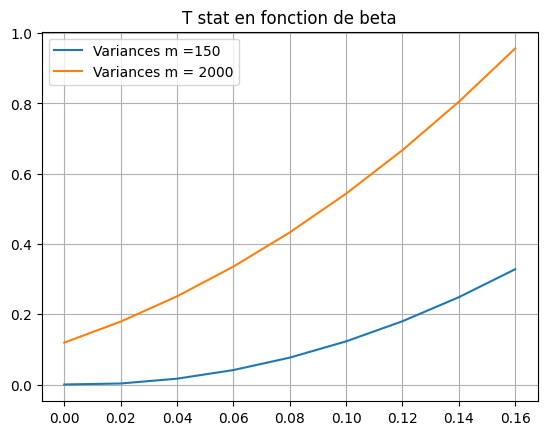

In [116]:
plt.figure()
plt.title("T stat en fonction de beta")
plt.plot(beta2_values, test_statistics_150, label = "T stat m = 150")
plt.plot(beta2_values, test_statistics_2000, label = "T stat m = 2000")
plt.grid()
plt.legend()
plt.show()

plt.figure()
plt.title("T stat en fonction de beta")
plt.plot(beta2_values, esperances_150, label = "Espérances m = 150")
plt.plot(beta2_values, esperances_2000, label = "Espérances m = 2000")
plt.grid()
plt.legend()
plt.show()

plt.figure()
plt.title("T stat en fonction de beta")
plt.plot(beta2_values, variances_150, label = "Variances m =150")
plt.plot(beta2_values, variances_2000, label = "Variances m = 2000")
plt.grid()
plt.legend()
plt.show()

[]

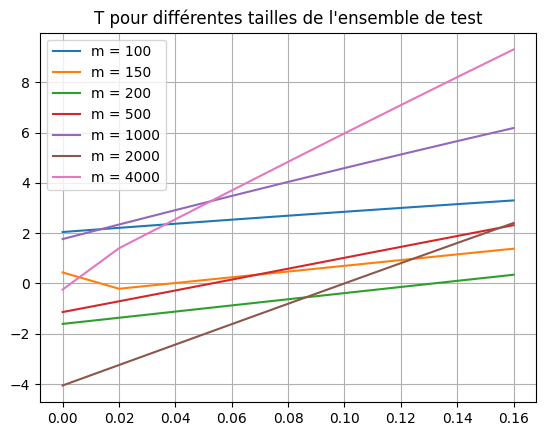

In [117]:
def comparaison_stats():
    M = [100, 150, 200, 500, 1000, 2000, 4000]
    np.random.seed(42)
    test_statistics2 = []

    for m in M:

       test_statistics, esperances_2000, variances_2000, msea_2000, mseb_2000 = power_simple(150,m)
       test_statistics2.append(test_statistics)

    df = pd.DataFrame(test_statistics2)
    df = df.transpose()
    df.columns = ["m = 100", "m = 150", "m = 200", "m = 500", "m = 1000", "m = 2000", "m = 4000"]

    return df


df = comparaison_stats()

plt.figure()
plt.title("T pour différentes tailles de l'ensemble de test")
plt.plot(beta2_values, df["m = 100"], label = "m = 100")
plt.plot(beta2_values, df["m = 150"], label = "m = 150")
plt.plot(beta2_values, df["m = 200"], label = "m = 200")
plt.plot(beta2_values, df["m = 500"], label = "m = 500")
plt.plot(beta2_values, df["m = 1000"], label = "m = 1000")
plt.plot(beta2_values, df["m = 2000"], label = "m = 2000")
plt.plot(beta2_values, df["m = 4000"], label = "m = 4000")
plt.grid()
plt.legend()
plt.plot()

In [118]:
def puissance_simple(n,m):

    np.random.seed(42)

    esperances = []
    variances = []
    test_statistics = []
    msea = []
    mseb = []
    power =  []

    beta1 = 2
    epsilon = np.random.normal(0, 1, n + m) 
    x = np.random.uniform(0, 5, n + m)

    x_train = x[:n]
    x_test = x[n:n+m]

    epsilon_train = epsilon[:n]
    epsilon_test = epsilon[n:n+m]
    
    for beta2 in beta2_values:
            
        y_train = beta1 * x_train + beta2 * x_train**2 + epsilon_train
        y_test = beta1 * x_test + beta2 * x_test**2 + epsilon_test

        # Linear Model : A
        model_a = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
        y_pred_a = model_a.predict(x_test.reshape(-1, 1))
        pa = (y_test - y_pred_a)**2
        msea.append(mean_squared_error(y_test, y_pred_a))

        # Quadratic Model : B
        x_train_quad = np.column_stack((x_train, x_train**2))
        x_test_quad = np.column_stack((x_test, x_test**2))
            
        model_b = LinearRegression().fit(x_train_quad, y_train)
        y_pred_b = model_b.predict(x_test_quad)
        pb = (y_test - y_pred_b)**2
        mseb.append(mean_squared_error(y_test, y_pred_b))

        differences = pa - pb

        d_barre = sum(differences)/m
        var = np.var(differences, ddof=1)
        test_stat = (m**0.5)*d_barre/np.sqrt(var)

        delta = d_barre
        student = stats.t.ppf(0.95, df=m-1)
        mu = (m ** 0.5)*delta/np.sqrt(var)
        puissance = 1 - stats.norm.cdf(student - mu, 0, 1)

        
        power.append(puissance)
        test_statistics.append(test_stat)
        esperances.append(d_barre)
        variances.append(var)

    return power, test_statistics, esperances, variances, msea, mseb


[]

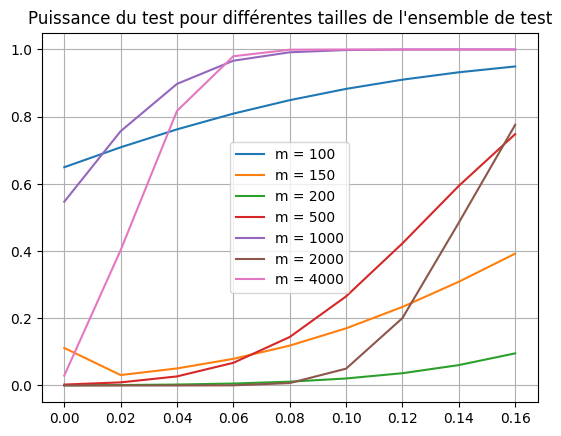

In [119]:
def comparaison_puissancess():
    M = [100, 150, 200, 500, 1000, 2000, 4000]
    np.random.seed(42)
    puissances2 = []

    for m in M:

       puissances, test_statistics, esperances_2000, variances_2000, msea_2000, mseb_2000 = puissance_simple(150,m)
       puissances2.append(puissances)

    df = pd.DataFrame(puissances2)
    df = df.transpose()
    df.columns = ["m = 100", "m = 150", "m = 200", "m = 500", "m = 1000", "m = 2000", "m = 4000"]

    return df

df2 = comparaison_puissancess()

plt.figure()
plt.title("Puissance du test pour différentes tailles de l'ensemble de test")
plt.plot(beta2_values, df2["m = 100"], label = "m = 100")
plt.plot(beta2_values, df2["m = 150"], label = "m = 150")
plt.plot(beta2_values, df2["m = 200"], label = "m = 200")
plt.plot(beta2_values, df2["m = 500"], label = "m = 500")
plt.plot(beta2_values, df2["m = 1000"], label = "m = 1000")
plt.plot(beta2_values, df2["m = 2000"], label = "m = 2000")
plt.plot(beta2_values, df2["m = 4000"], label = "m = 4000")
plt.grid()
plt.legend()
plt.plot()
